*This is a machine learning project that uses Linear Regression to predict medals that countries will win in the olympics with 2 factors - no. of athletes participating and the previous medals won by the country.*


#**Data Loading**

> Pandas is imported to assist us to load and manipulate the data. The data is loaded from a csv file link. The csv file itself has been included in the respository for purposes of working locally.


In [14]:
import pandas as pd

In [15]:
teams = pd.read_csv('https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/beginner_ml/teams.csv')

In [16]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


#**Data Exploration**

##**Data Cleaning**

###**Removing Columns**
>Here, unwanted columns are removed from the previously loaded csv file. These columns will not be necessary for the model we are building. The method below actually specifies the columns we need and the rest are automatically dropped off.

In [17]:
teams = teams[[
    "team",
    "country",
    "year",
    "athletes",
    "age",
    "prev_medals",
    "medals"]]

In [18]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


###**Removing Empty Rows**
>The dataset that was loaded contains some incomplete rows. These rows are mostly missing entries in the "prev_medals" column as not every country participated in every olympic. We would first locate these rows and then drop them.

In [19]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [20]:
teams = teams.dropna()

In [ ]:
teams

##**Analyzing the Data**

> Here, the correlation between the items of each column is checked. It is preferable to find a cloumn with strong correclation as it will enable build a more accurate model.



In [21]:
teams.corr()["medals"]

<ipython-input-21-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

##**Individual Correlation Check**
>Each column is plotted against the medal column(what we will seek to predic) to visually identify the correlation between them. A library called Seaborn is imported to assist us to do this.

In [22]:
import seaborn as sns

###*Athletes vs Medals*

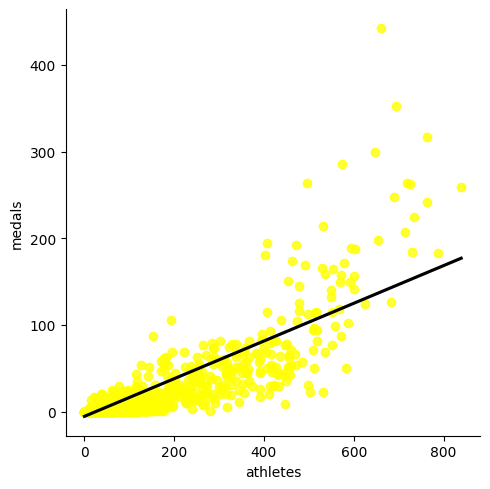

In [23]:
sns.lmplot(x = "athletes",
           y = "medals",
           data = teams,
           fit_reg = True,
           ci = None,
           scatter_kws = {"color" : "yellow"},
           line_kws = {"color" : "black"})


###*Age Vs Medals*

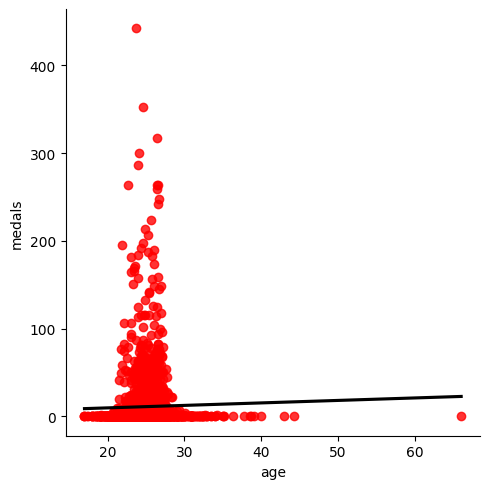

In [24]:
sns.lmplot(x = "age",
           y = "medals",
           data = teams,
           fit_reg = True,
           ci = None,
           scatter_kws = {'color' : 'red'},
           line_kws = {'color' : 'black'})

###*Previous Medals Vs Medals*

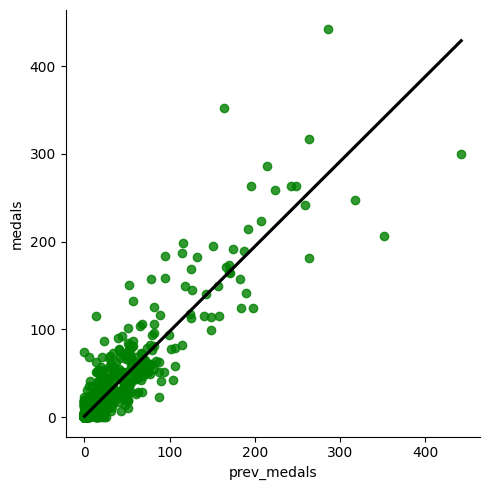

In [25]:
sns.lmplot(x = "prev_medals",
           y = "medals",
           data = teams,
           fit_reg = True,
           ci = None,
           scatter_kws = {'color' : 'green'},
           line_kws = {'color' : 'black'})

##**Identifying Balance**
>A histogram is used to identify the balance in the column to be predicted(medals).

<Axes: ylabel='Frequency'>

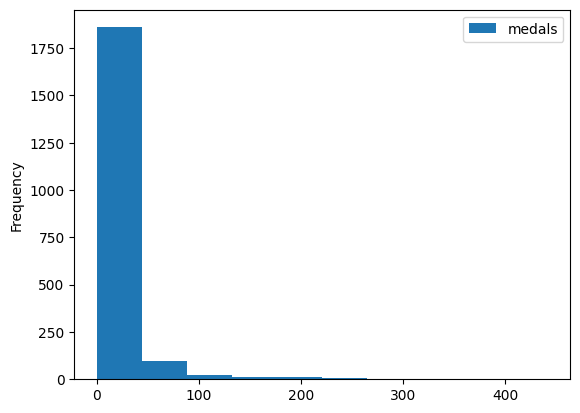

In [26]:
teams.plot.hist(y = "medals")

#**Model Building**


##**Data Splitting**
>Here, the dataset is split into training and testing datasets. Specifically in this project, the years before 2012 are put into the train dataset and 2012 and the years after are put in the test dataset. This is to allow the model to be trained with the medals for previous years so it can predict the medals for future years. By using 2012 as the benchmark, we also maintain the quasi-normal split of 80/20.

In [28]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [29]:
train.shape

(1609, 7)

In [30]:
test.shape

(405, 7)

##**Model Training**

###**Importing Model**
> Here we import our desired model, Linear Regression.

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

###**Fitting Model**

Here, we chose our desired predictors and train the model using the fit method. The predictors are the columns that are going to be used to predict our target, which is medals.

In [32]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [33]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

##**Making Predictions**

Here, we use our trained dataset to make predictions and add the predictions to our test dataset as a column.

In [36]:
predictions = reg.predict(test[predictors])
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [37]:
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


#**Measuring Error**

##**Rescaling Predictions**

From our above dataset, we can recognize that our predictions are not rounded and most of them are negatives. This can't be so since we can't have fractions of medals or negative medals. Therefore, we will correct the model to fix these issues.

In [38]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [39]:
test["predictions"] = test["predictions"].round()

In [40]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


##**Measuring How Good Model Is**
>Mean Absolute Error is imported to measure our error for us and from the below, we can tell that we were roughly 3 medals off the actual medals won by a country/team.

In [41]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(test["medals"], test["predictions"])

In [42]:
error

3.2987654320987656

However, having our mean absolute error well below the standard deviation tells us that the model is somewhat good. This shows that the variability in the predictions are smaller thatn that in the data.

In [ ]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

##**Exploring the Errors Further**

We can tell from below that the predcitions for the medals USA won are quite good, considering how many medals they win.

In [43]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


However, for India 2016, we were off by 12 medals. The difference between the medals the actually won and our prediction is larger that the medals they won and this indicates a very high mean absolute error. We can concur that the mean absolute errors largely vary for each other and we will go deeper to explore that.

In [44]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


We will now look at the absolute errors on a country basis.

In [49]:
errors = (test["medals"] - test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

We would now use the grouby() method to group the errors by team and calculate their mean errors.

In [50]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

Here, we would look at the average medals won by teams.

In [52]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

We will now find the error ratio of each team.

In [53]:
error_ratio = error_by_team / medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

We will now clear the NaN and inf values so we can analyze the errors properly.

In [55]:
error_ratio[~pd.isnull(error_ratio)]


team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

In [56]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

The histogram will allow us to visualize the error ratios.

<Axes: ylabel='Frequency'>

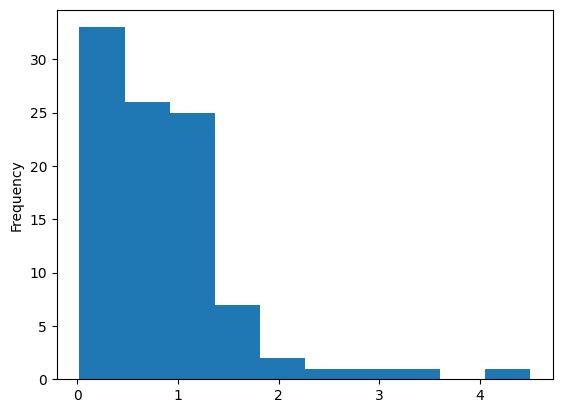

In [57]:
error_ratio.plot.hist()

We will now sort "error_ratio" by the error ratios obtained to see with which country our model works best. We can tell that the model works best with countries that tend to get a lot of medals in the olympics. Countries like France, Canada, etc. However, it works worst with countries which dont tend to win a lot of medals.

In [58]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64